In [1]:
from progressbar import ProgressBar
from urb_kitti import *
import cv2
%matplotlib inline

Read frames from KITTI sequence 00 into a list of frames (frame).

In [2]:
bar = ProgressBar()
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_2'
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_3'

seq = Sequence()
for frameid in bar(range(100)):
    filename = '%06d.png'%(frameid)
    left_frame = Frame(LEFTDIR + '/' + filename, RIGHTDIR)
    seq.add_frame(left_frame, clean=True)

 18% (18 of 100) |####                    | Elapsed Time: 0:00:13 ETA:  0:01:14

 36% (36 of 100) |########                | Elapsed Time: 0:00:33 ETA:  0:01:09

 37% (37 of 100) |########                | Elapsed Time: 0:00:35 ETA:  0:01:05

 38% (38 of 100) |#########               | Elapsed Time: 0:00:36 ETA:  0:01:11

 40% (40 of 100) |#########               | Elapsed Time: 0:00:38 ETA:  0:01:05

 41% (41 of 100) |#########               | Elapsed Time: 0:00:39 ETA:  0:01:10

 42% (42 of 100) |##########              | Elapsed Time: 0:00:40 ETA:  0:01:09

 43% (43 of 100) |##########              | Elapsed Time: 0:00:42 ETA:  0:01:07

 44% (44 of 100) |##########              | Elapsed Time: 0:00:43 ETA:  0:01:05

 45% (45 of 100) |##########              | Elapsed Time: 0:00:44 ETA:  0:01:03

 46% (46 of 100) |###########             | Elapsed Time: 0:00:45 ETA:  0:01:01

 47% (47 of 100) |###########             | Elapsed Time: 0:00:46 ETA:  0:00:58

 48% (48 of 100) |###########             | Elapsed Time: 0:00:47 ETA:  0:00:55

 49% (49 of 100) |###########             | Elapsed Time: 0:00:48 ETA:  0:00:53

 51% (51 of 100) |############            | Elapsed Time: 0:00:49 ETA:  0:00:48

 53% (53 of 100) |############            | Elapsed Time: 0:00:51 ETA:  0:00:44

 56% (57 of 100) |#############           | Elapsed Time: 0:00:55 ETA:  0:00:40

 62% (62 of 100) |##############          | Elapsed Time: 0:00:59 ETA:  0:00:31

 65% (65 of 100) |###############         | Elapsed Time: 0:01:02 ETA:  0:00:28

 68% (68 of 100) |################        | Elapsed Time: 0:01:04 ETA:  0:00:25

 73% (73 of 100) |#################       | Elapsed Time: 0:01:07 ETA:  0:00:18

100% (100 of 100) |#######################| Elapsed Time: 0:01:18 Time: 0:01:18


In [3]:
trajectoryXZ = []
points = []

for frame in seq.keyframes[:]:
    pose = frame.get_pose()
    if pose is not None:
        points_new = []
        for p in points:
            p = np.dot(pose, p)
            points_new.append(p)
        points = points_new
        new_point = np.array([0,0,0,1.0])
        points.append(new_point)
  

minx = min([p[0] for p in points])
maxx = max([p[0] for p in points])
miny = min([p[2] for p in points])
maxy = max([p[2] for p in points])
maxxy = max(maxx - minx, maxy - miny)

for p in points:
    #print(p)
    x = 400 * (p[0] - minx) / (maxxy)
    z = 400 * (p[2] - miny) / (maxxy)
    trajectoryXZ.append([x, z])

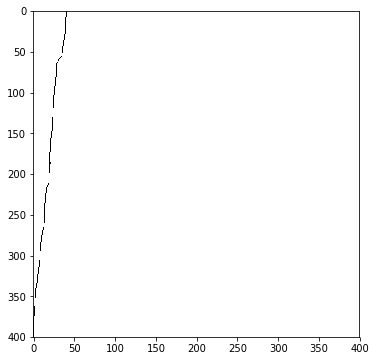

In [4]:
# Create a blank image
img = np.zeros((400, 400, 3), np.uint8) 
img[:] = 255 #or img.fill(255)

# Draw a black line with thickness of 2 px
for i in range(1,len(trajectoryXZ)):
    cv2.line(img, (int(trajectoryXZ[i - 1][0]), int(trajectoryXZ[i - 1][1])), (int(trajectoryXZ[i][0]), int(trajectoryXZ[i][1])), (0, 0, 0), 1)
show(img)